<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

## Empirical distributions

大多数水文变量都是连续的，但由于我们的测量能力，我们对它们进行了离散测量。使用bin进行离散数据的分类，为离散数据的平均连续处理提供了手段。数据的底层分布的可视化是通过绘制直方图实现的。直方图描述离散区间上的频率。让我们从直方图开始。在下面的例子中，首先我们将生成一些虚拟的数据，然后计算并绘制直方图。

In [9]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

x = np.random.randn(100) #生成模拟数据

# 计算直方图
n,low_range,binsize,extrapoints = st.histogram(x)
upper_range = low_range + binsize*(len(n)-1)
bins = np.linspace(low_range,upper_range,len(n))

C:\Users\laihetao\AppData\Local\conda\conda\envs\dlnd\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `histogram` is deprecated!
scipy.stats.histogram is deprecated in scipy 0.17.0; use np.histogram instead
  if __name__ == '__main__':


`st,histogram`提供了在每个区间(n)中bin的数量，bin的下限(low_range),bins的宽(binsize)，以及不用于计算直方图的点。由于bin的大小与所有的bin相同，所以Pyhon只提供一个bin的大小。我们使用bin 的下限和大小来计算bin的上限范围，然而计算所有bin的中农位数的值。现在可以使用`bar`绘制直方图。我们也将定义bar的宽度和颜色

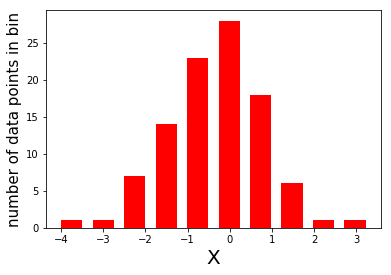

In [27]:
plt.bar(bins,n,width=0.5,color='red')
plt.xlabel('X',fontsize=20)
plt.ylabel('number of data points in bin',fontsize=15)
plt.show()

<center>图5.1:x的直方图</center>

数据的直方图如图5.1所示。在这个例子中，因为我们刚刚从正态分布创建了100个随机数，直方图没有展示正态分布应该显示的行为。

直方图中的每个bar都告诉我们，数据在特定的bin中有多少次。查看数据的行为的一个更好的方法是查看相对直方图，它告诉我们点在某一范围内发概率。通过将每个bin的频率除以所有箱中的频率之和，得到相对直方图或相对频率。相对直方图表示数据发生在bin中的数据的概率。要么是我们可以使用`histogram`函数先计算直方图，然后除以频率总数，要么是我们直接使用`relfreq`函数。`relfreq`提供了相对频率，连同其他与`histogram`类似的输出。

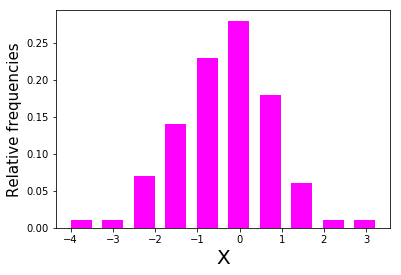

In [29]:
relfreqs,lowlim,binsize,extrapoints = st.relfreq(x)
plt.bar(bins,relfreqs,width=0.5,color='magenta')
plt.xlabel('X',fontsize=20)
plt.ylabel('Relative frequencies',fontsize=15)
plt.show()